In [2]:
import matplotlib.pyplot as plt
import os
from typing import Tuple, List, Dict, Union
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
# noinspection PyUnresolvedReferences
from tensorflow.keras.models import Sequential
# noinspection PyUnresolvedReferences
from tensorflow.keras.layers import Dense, Dropout, Conv1D, MaxPooling1D, Flatten, BatchNormalization
# noinspection PyUnresolvedReferences
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import seaborn as sns

# Defining file path
ecg_folder = "../../../Datasets/12-lead electrocardiogram database/ECGData"
attributes_file = "../../../Datasets/12-lead electrocardiogram database/AttributesDictionary.xlsx"
diagnostics_file = "../../../Datasets/12-lead electrocardiogram database/Diagnostics.xlsx"
rhythm_names_file = "../../../Datasets/12-lead electrocardiogram database/RhythmNames.xlsx"

# Checking for missing files and stuff
for file_path in [attributes_file, diagnostics_file, rhythm_names_file]:
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Required file not found: {file_path}")

# Loading metadata
attributes_df = pd.read_excel(attributes_file)
diagnostics_df = pd.read_excel(diagnostics_file)
rhythm_names_df = pd.read_excel(rhythm_names_file)

# Removing trailing spaces in acronym columns for accurate matching
rhythm_names_df['Acronym Name'] = rhythm_names_df['Acronym Name'].str.strip()

# Creating sets of valid acronyms for rhythm
valid_rhythms = set(rhythm_names_df['Acronym Name'])
print(valid_rhythms)


{'AVRT', 'AFIB', 'SI', 'ST', 'SVT', 'SB', 'AT', 'SAAWR', 'AVNRT', 'AF', 'SR'}



Running experiment: Lead 2


Loading ECG files: 10646it [00:53, 197.23it/s]
/home/denuvo-drm/miniconda3/envs/CompositeADLRecognition/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1732512852.398274  416914 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1732512852.434965  416914 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/

Epoch 1/50


2024-11-25 11:34:12.789584: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 136240000 exceeds 10% of free system memory.
2024-11-25 11:34:12.912537: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 136240000 exceeds 10% of free system memory.
I0000 00:00:1732512854.361964  418226 service.cc:146] XLA service 0x79d2b8007930 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1732512854.361994  418226 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3070, Compute Capability 8.6
2024-11-25 11:34:14.427558: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-25 11:34:14.618316: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907


 87/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3099 - loss: 1.7860

I0000 00:00:1732512856.467321  418226 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


213/213 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.3373 - loss: 1.6556 - val_accuracy: 0.4988 - val_loss: 1.1143 - learning_rate: 0.0010
Epoch 2/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5051 - loss: 1.1428 - val_accuracy: 0.5687 - val_loss: 1.0050 - learning_rate: 0.0010
Epoch 3/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5904 - loss: 0.9661 - val_accuracy: 0.5851 - val_loss: 0.9486 - learning_rate: 0.0010
Epoch 4/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6460 - loss: 0.8483 - val_accuracy: 0.5869 - val_loss: 0.9490 - learning_rate: 0.0010
Epoch 5/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6967 - loss: 0.7639 - val_accuracy: 0.5951 - val_loss: 0.9464 - learning_rate: 0.0010
Epoch 6/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7377 - loss: 0.6786 - val_accuracy: 0.6062 - val_loss: 0.9534 - learning_rate: 0.0010
Epoch 7/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7943 - loss: 0.5386 - val_accura

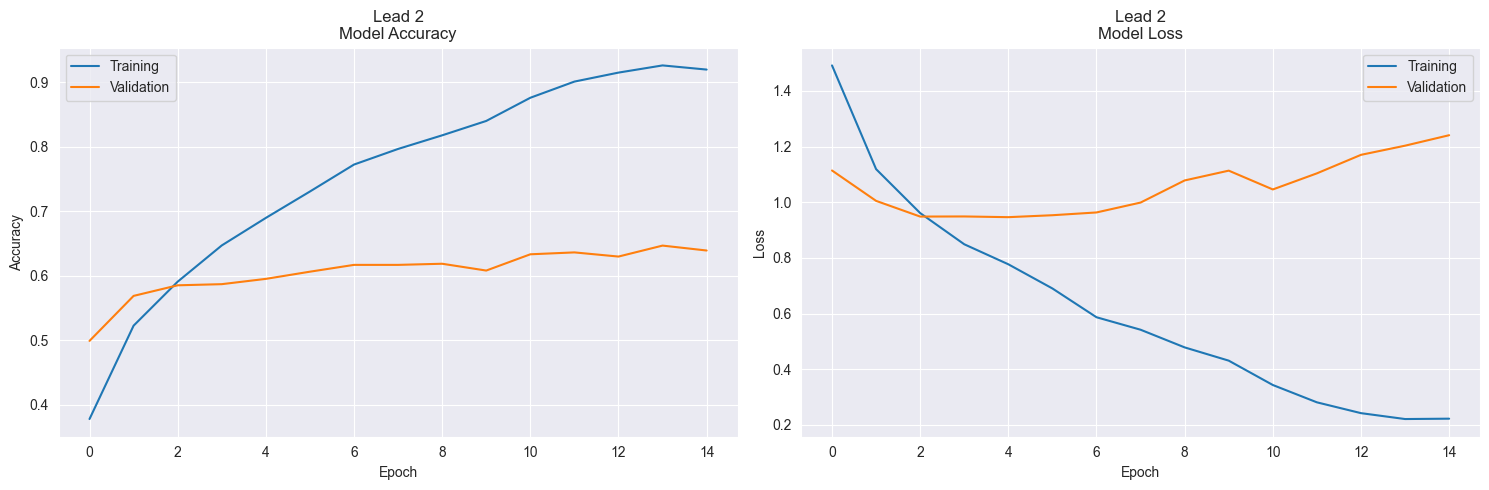

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


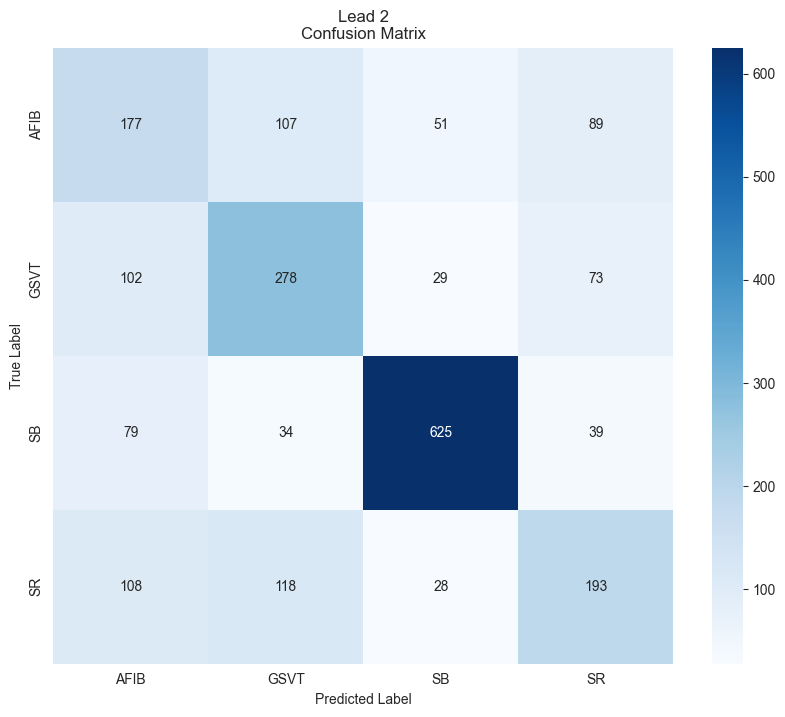


Classification Report for Lead 2:
              precision    recall  f1-score      support
AFIB           0.379828  0.417453  0.397753   424.000000
GSVT           0.517691  0.576763  0.545633   482.000000
SB             0.852660  0.804376  0.827815   777.000000
SR             0.489848  0.431767  0.458977   447.000000
accuracy       0.597653  0.597653  0.597653     0.597653
macro avg      0.560007  0.557590  0.557544  2130.000000
weighted avg   0.606598  0.597653  0.600947  2130.000000
Test Accuracy: 0.5977

Running experiment: Leads 2, 8


Loading ECG files: 10646it [00:39, 271.05it/s]
/home/denuvo-drm/miniconda3/envs/CompositeADLRecognition/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


2024-11-25 11:35:09.544463: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 272480000 exceeds 10% of free system memory.
2024-11-25 11:35:09.786614: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 272480000 exceeds 10% of free system memory.


213/213 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - accuracy: 0.3719 - loss: 1.5695 - val_accuracy: 0.5763 - val_loss: 0.9773 - learning_rate: 0.0010
Epoch 2/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5594 - loss: 1.0085 - val_accuracy: 0.6133 - val_loss: 0.8963 - learning_rate: 0.0010
Epoch 3/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6587 - loss: 0.8195 - val_accuracy: 0.6320 - val_loss: 0.8594 - learning_rate: 0.0010
Epoch 4/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7310 - loss: 0.6864 - val_accuracy: 0.6397 - val_loss: 0.8723 - learning_rate: 0.0010
Epoch 5/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7924 - loss: 0.5557 - val_accuracy: 0.6414 - val_loss: 0.8909 - learning_rate: 0.0010
Epoch 6/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8132 - loss: 0.4850 - val_accuracy: 0.6620 - val_loss: 0.9067 - learning_rate: 0.0010
Epoch 7/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8551 - loss: 0.3896 - val_accura

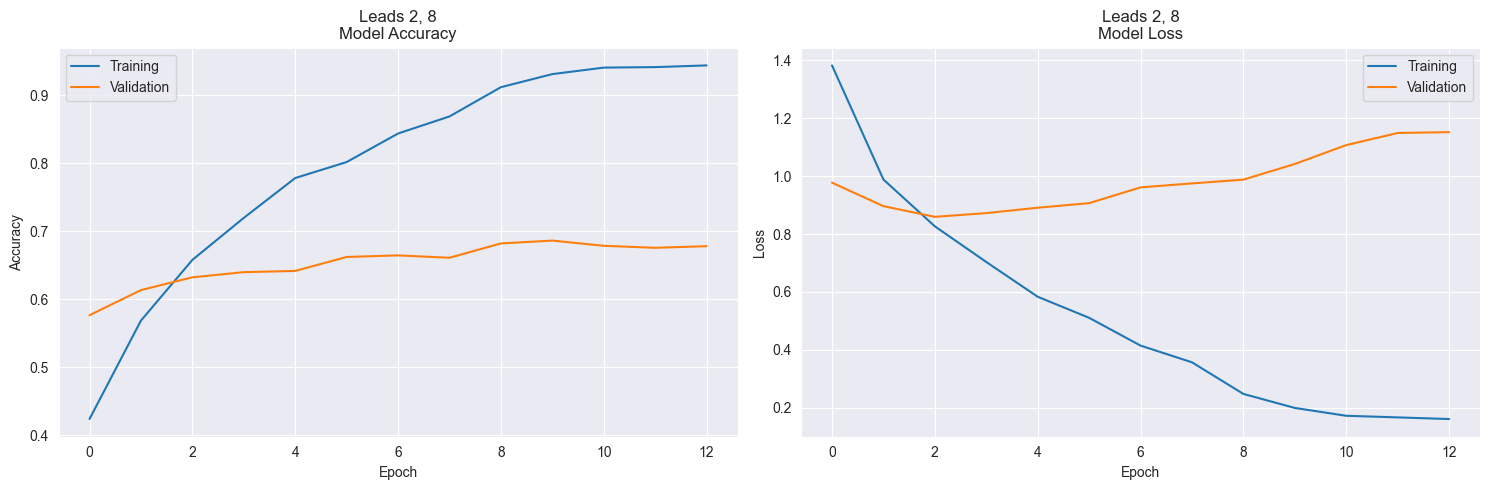

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


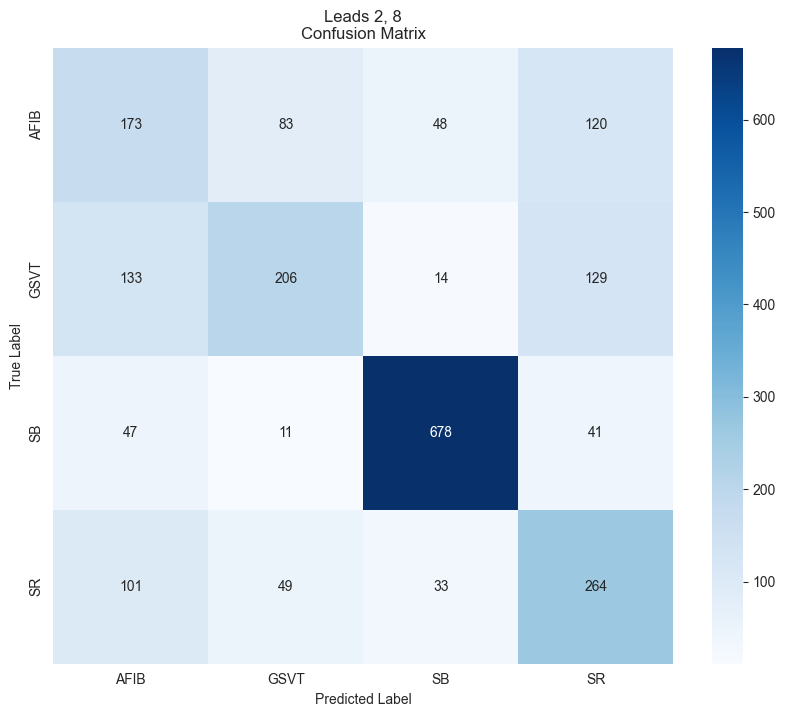


Classification Report for Leads 2, 8:
              precision    recall  f1-score      support
AFIB           0.381057  0.408019  0.394077   424.000000
GSVT           0.590258  0.427386  0.495788   482.000000
SB             0.877102  0.872587  0.874839   777.000000
SR             0.476534  0.590604  0.527473   447.000000
accuracy       0.620188  0.620188  0.620188     0.620188
macro avg      0.581238  0.574649  0.573044  2130.000000
weighted avg   0.629386  0.620188  0.620464  2130.000000
Test Accuracy: 0.6202

Running experiment: Leads 2, 8, 9


Loading ECG files: 10646it [00:41, 257.62it/s]
/home/denuvo-drm/miniconda3/envs/CompositeADLRecognition/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


2024-11-25 11:36:08.565036: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 408720000 exceeds 10% of free system memory.


213/213 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.3587 - loss: 1.5698 - val_accuracy: 0.5915 - val_loss: 0.9414 - learning_rate: 0.0010
Epoch 2/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5957 - loss: 0.9442 - val_accuracy: 0.6039 - val_loss: 0.8842 - learning_rate: 0.0010
Epoch 3/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6585 - loss: 0.8095 - val_accuracy: 0.6403 - val_loss: 0.8395 - learning_rate: 0.0010
Epoch 4/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7305 - loss: 0.6523 - val_accuracy: 0.6420 - val_loss: 0.8395 - learning_rate: 0.0010
Epoch 5/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7922 - loss: 0.5278 - val_accuracy: 0.6555 - val_loss: 0.8550 - learning_rate: 0.0010
Epoch 6/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8265 - loss: 0.4369 - val_accuracy: 0.6561 - val_loss: 0.8980 - learning_rate: 0.0010
Epoch 7/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8653 - loss: 0.3656 - val_accura

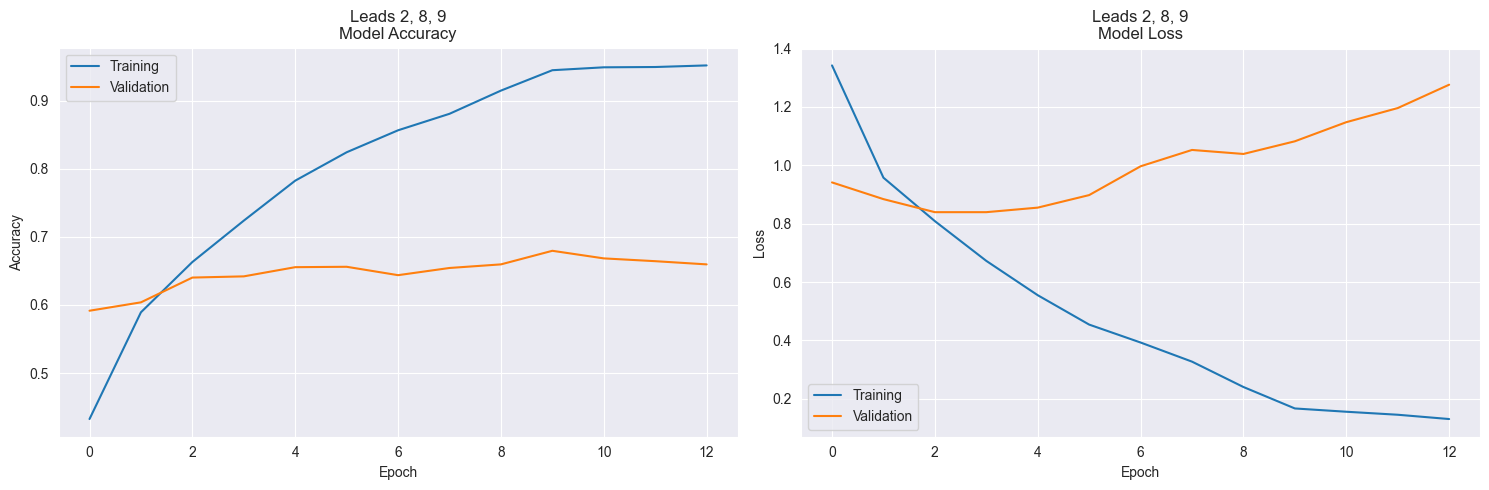

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


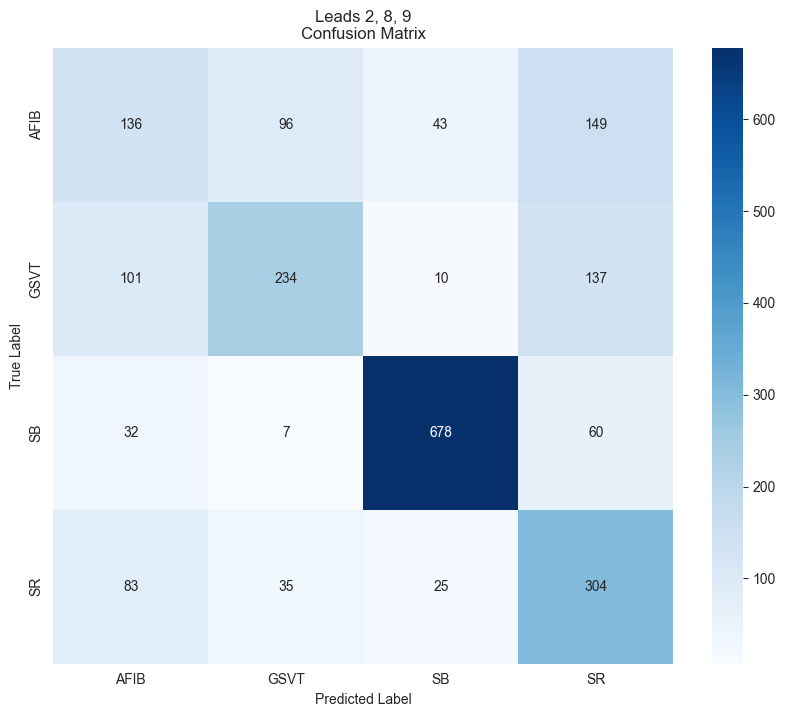


Classification Report for Leads 2, 8, 9:
              precision    recall  f1-score      support
AFIB           0.386364  0.320755  0.350515   424.000000
GSVT           0.629032  0.485477  0.548009   482.000000
SB             0.896825  0.872587  0.884540   777.000000
SR             0.467692  0.680089  0.554239   447.000000
accuracy       0.634742  0.634742  0.634742     0.634742
macro avg      0.594978  0.589727  0.584326  2130.000000
weighted avg   0.644556  0.634742  0.632766  2130.000000
Test Accuracy: 0.6347

Running experiment: Leads 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12


Loading ECG files: 10646it [00:43, 244.89it/s]
/home/denuvo-drm/miniconda3/envs/CompositeADLRecognition/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.3578 - loss: 1.6395 - val_accuracy: 0.5528 - val_loss: 1.0151 - learning_rate: 0.0010
Epoch 2/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5441 - loss: 1.0384 - val_accuracy: 0.5681 - val_loss: 0.9555 - learning_rate: 0.0010
Epoch 3/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6549 - loss: 0.8158 - val_accuracy: 0.5980 - val_loss: 0.9382 - learning_rate: 0.0010
Epoch 4/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7467 - loss: 0.6213 - val_accuracy: 0.5851 - val_loss: 0.9839 - learning_rate: 0.0010
Epoch 5/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8144 - loss: 0.4955 - val_accuracy: 0.6056 - val_loss: 1.0361 - learning_rate: 0.0010
Epoch 6/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8620 - loss: 0.3818 - val_accuracy: 0.6162 - val_loss: 1.1151 - learning_rate: 0.0010
Epoch 7/50
213/213 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8821 - loss: 0.3297 

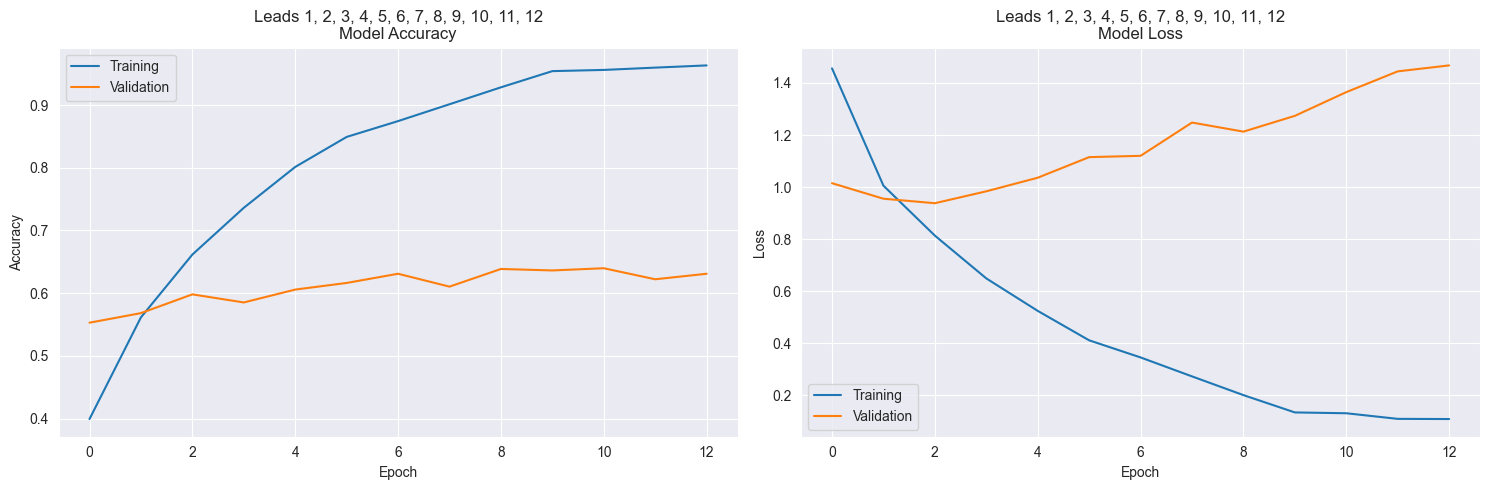

67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


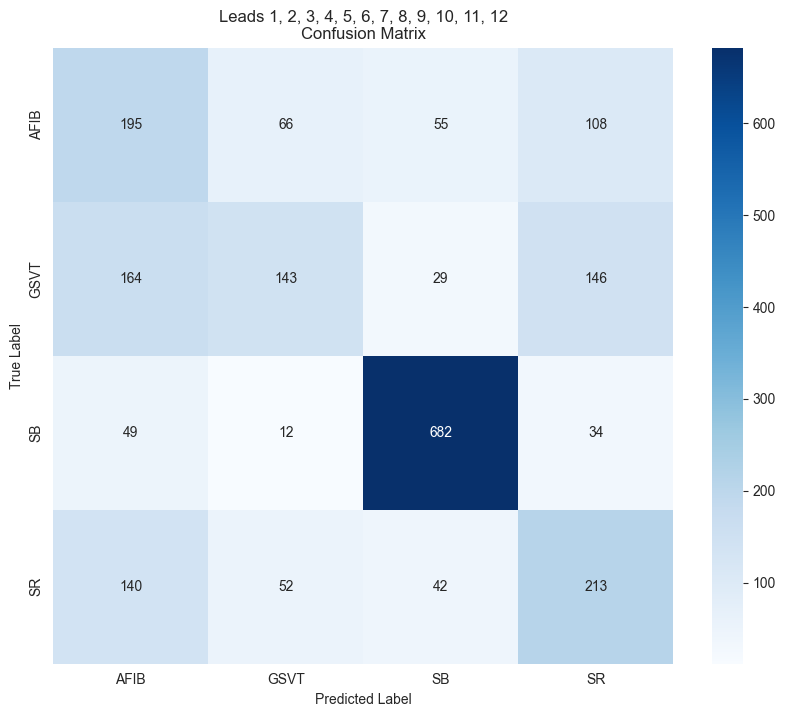


Classification Report for Leads 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12:
              precision    recall  f1-score      support
AFIB           0.355839  0.459906  0.401235   424.000000
GSVT           0.523810  0.296680  0.378808   482.000000
SB             0.844059  0.877735  0.860568   777.000000
SR             0.425150  0.476510  0.449367   447.000000
accuracy       0.578873  0.578873  0.578873     0.578873
macro avg      0.537215  0.527708  0.522494  2130.000000
weighted avg   0.586492  0.578873  0.573820  2130.000000
Test Accuracy: 0.5789


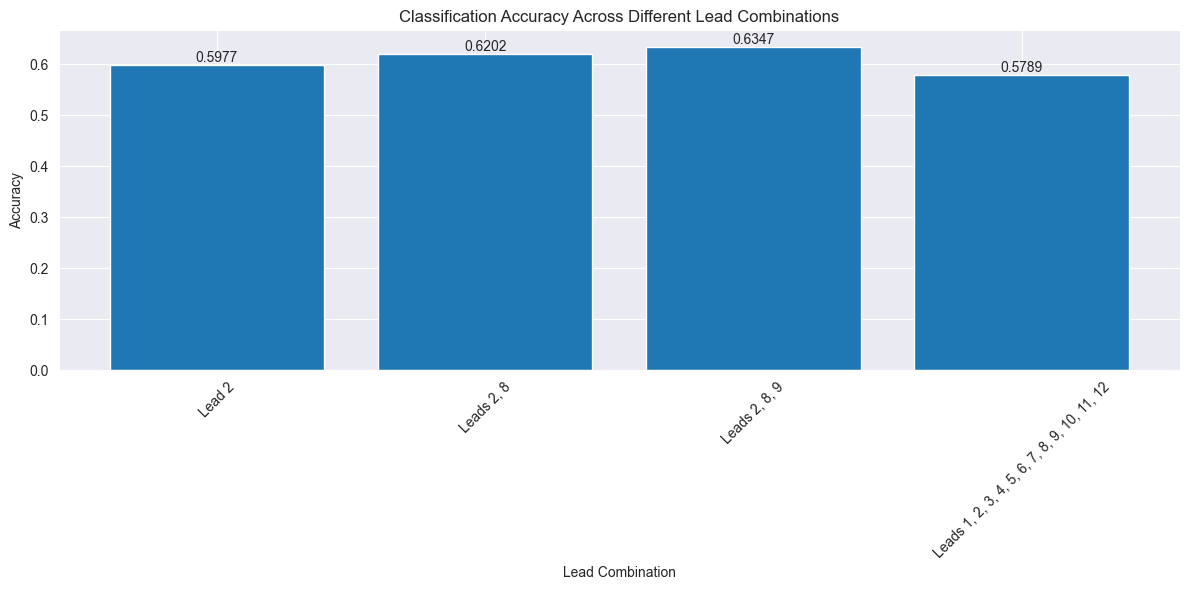

In [3]:
from sklearn.metrics import confusion_matrix


def load_and_preprocess_data(
        ecg_folder: str,
        diagnostics_df: pd.DataFrame,
        rhythm_mapping: Dict[str, str],
        selected_leads: Union[int, List[int]],
        num_timesteps: int = 5000
) -> Tuple[np.ndarray, np.ndarray]:
    """
    Load and preprocess ECG signals for specified leads
    
    Args:
        selected_leads: Either a single lead index (0-11) or list of lead indices
    """
    if isinstance(selected_leads, int):
        selected_leads = [selected_leads]

    signals_list = []
    labels = []

    for idx, row in tqdm(diagnostics_df.iterrows(), desc="Loading ECG files"):
        file_path = os.path.join(ecg_folder, f"{row['FileName']}.csv")

        if os.path.exists(file_path):
            try:
                # Load ECG signal
                signal = pd.read_csv(file_path).values  # Shape: [timesteps, leads]

                if signal.shape[0] == num_timesteps:
                    # Select only the specified leads
                    selected_signal = signal[:, selected_leads]
                    flattened_signal = selected_signal.flatten()
                    signals_list.append(flattened_signal)

                    # Map rhythm to reduced set
                    rhythm = row['Rhythm']
                    mapped_rhythm = rhythm_mapping.get(rhythm, None)
                    if mapped_rhythm:
                        labels.append(mapped_rhythm)

            except Exception as e:
                print(f"Error processing file {file_path}: {str(e)}")
                continue

    return np.array(signals_list), np.array(labels)


def create_mlp_model(input_shape: int, num_classes: int) -> tf.keras.Model:
    """
    Create an MLP model with architecture adjusted based on input size
    """
    model = Sequential([
        # Input layer - size depends on number of leads
        Dense(512, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),
        Dropout(0.3),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(num_classes, activation='softmax')
    ])

    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


def train_and_evaluate(
        X: np.ndarray,
        y: np.ndarray,
        batch_size: int = 32,
        epochs: int = 50,
        experiment_name: str = ""
) -> Tuple[tf.keras.Model, dict, float]:
    """
    Train and evaluate the MLP model
    """
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Scale the features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Convert labels to categorical
    le = LabelEncoder()
    y_train_encoded = le.fit_transform(y_train)
    y_test_encoded = le.transform(y_test)
    y_train_cat = to_categorical(y_train_encoded)
    y_test_cat = to_categorical(y_test_encoded)

    # Create and train model
    model = create_mlp_model(X_train.shape[1], len(set(y_train)))

    # Train the model
    history = model.fit(
        X_train_scaled,
        y_train_cat,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        callbacks=[
            tf.keras.callbacks.EarlyStopping(
                monitor='val_loss',
                patience=10,
                restore_best_weights=True
            ),
            tf.keras.callbacks.ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.5,
                patience=5,
                min_lr=1e-6
            )
        ],
        verbose=1
    )

    # Plot training history
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training')
    plt.plot(history.history['val_accuracy'], label='Validation')
    plt.title(f'{experiment_name}\nModel Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training')
    plt.plot(history.history['val_loss'], label='Validation')
    plt.title(f'{experiment_name}\nModel Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Evaluate model
    y_pred = model.predict(X_test_scaled)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test_cat, axis=1)

    # Generate classification report
    report = classification_report(
        y_test_classes,
        y_pred_classes,
        target_names=le.classes_,
        output_dict=True
    )

    # Plot confusion matrix
    plt.figure(figsize=(10, 8))
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    sns.heatmap(
        cm,
        annot=True,
        fmt='d',
        xticklabels=le.classes_,
        yticklabels=le.classes_,
        cmap='Blues'
    )
    plt.title(f'{experiment_name}\nConfusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # Calculate test accuracy
    test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test_cat, verbose=0)

    return model, report, test_accuracy


def run_lead_experiments(
        ecg_folder: str,
        diagnostics_df: pd.DataFrame,
        rhythm_mapping: Dict[str, str],
        lead_combinations: List[Union[int, List[int]]]
) -> Dict[str, float]:
    """
    Run experiments with different lead combinations
    """
    results = {}

    for leads in lead_combinations:
        # Create experiment name
        if isinstance(leads, int):
            exp_name = f"Lead {leads + 1}"  # +1 for human-readable lead numbers
        else:
            exp_name = f"Leads {', '.join(str(l + 1) for l in leads)}"

        print(f"\nRunning experiment: {exp_name}")

        # Load data for this lead combination
        X, y = load_and_preprocess_data(ecg_folder, diagnostics_df, rhythm_mapping, leads)

        # Train and evaluate
        model, report, accuracy = train_and_evaluate(X, y, experiment_name=exp_name)

        # Store results
        results[exp_name] = accuracy

        print(f"\nClassification Report for {exp_name}:")
        print(pd.DataFrame(report).transpose())
        print(f"Test Accuracy: {accuracy:.4f}")

    return results


def plot_lead_comparison(results: Dict[str, float]):
    """
    Plot comparison of results across different lead combinations
    """
    plt.figure(figsize=(12, 6))
    experiments = list(results.keys())
    accuracies = list(results.values())

    bars = plt.bar(experiments, accuracies)
    plt.title('Classification Accuracy Across Different Lead Combinations')
    plt.xlabel('Lead Combination')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=45)

    # Add value labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2., height,
                 f'{height:.4f}',
                 ha='center', va='bottom')

    plt.tight_layout()
    plt.show()


rhythm_mapping = {
    'AFIB': 'AFIB',
    'AF': 'AFIB',
    'SVT': 'GSVT',
    'AT': 'GSVT',
    'SAAWR': 'GSVT',
    'ST': 'GSVT',
    'AVNRT': 'GSVT',
    'AVRT': 'GSVT',
    'SB': 'SB',
    'SR': 'SR',
    'SA': 'SR'
}

# Define lead combinations to test
# Note: Lead indices are 0-based (Lead 1 = index 0, Lead 2 = index 1, etc.)
lead_combinations = [
    1,  # Lead 2 only
    [1, 7],  # Leads 2 and 8
    [1, 7, 8],  # Leads 2, 8, and 9
    list(range(12))  # All leads
]

results = run_lead_experiments(ecg_folder, diagnostics_df, rhythm_mapping, lead_combinations)

plot_lead_comparison(results)